In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import netCDF4 as nc
import datetime
import pandas as pd

In [90]:
def get_datetimes(icontimes):
    """
    takes an array of timevalues from netcdf files, eg 20161119.05555556 and creates a datetime argument, eg
    arguments: 
        icontimes: 1-D Array of icon floats for time
    """
    
    out=[]
    for i in icontimes:
        year = int(i // 10000)
        month = int(i // 100 - year * 100)
        day = int(i // 1 - year * 10000 - month * 100)
        date = datetime.datetime(year,month,day)
        time = datetime.timedelta(hours=24*(i%1))
        out.append(date+time)
    return out
def get_datetime(icontime):
    """
    takes a float timevalue from icon data and returns that as a datetime object
    arguments:
        icontime: float containing icon time eg  20161119.05555556->
    """
    year = int(icontime // 10000)
    month = int(icontime // 100 - year * 100)
    day = int(icontime // 1 - year * 10000 - month * 100)
    date = datetime.datetime(year,month,day)
    time = datetime.timedelta(hours=24*(icontime%1))
    out= date+time
    return out

#### Read the data

In [3]:
path = "/work/bb1070/b381019/Output/Output_1911/inwp_gscp4/aci_cold6/"
dataname = "icon-art-LAM-THUNDER-aero_DOM01_ML_*"
data = xr.open_mfdataset(path + dataname)

#### Extract variable to be plotted (eg Temperaure) and time

In [95]:
start_t =0
end_t = 500
cell_idx = 15023
variable= 'temp'
var = data[variable].isel(height=-1,time=slice(start_t,end_t),ncells=cell_idx).values
time = get_datetimes(data['time'].isel(time=slice(start_t,end_t)).values)

#### Make Temperature-Time Plot of data

Text(0.5, 1.0, 'temperature over time at gridpoint 15023')

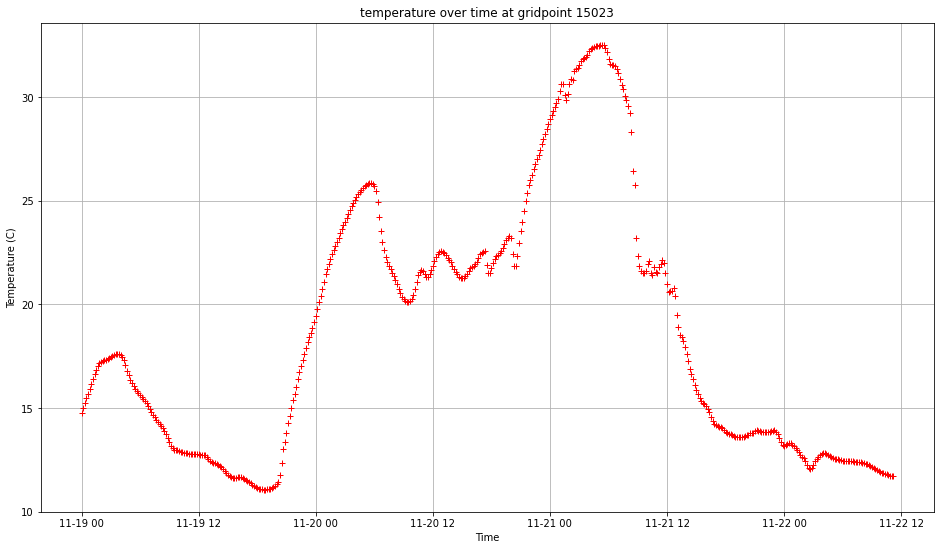

In [101]:
plt.figure(figsize=(16,9 ),facecolor='white')
plt.plot(time,var-273.15,'r+')
plt.ylabel('Temperature (C)' )
plt.xlabel('Time')
plt.xticks()
plt.grid(True)
plt.title('temperature over time at gridpoint {}'.format(cell_idx))